In [18]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

Steps:
Prepare the Data
Apply Dimensionality Reduction
Perform a Cluster Analysis with K-means
Make a Recommendation

# Part 1: Prepare the Data

In [19]:
# Read myopia.csv into a Pandas DataFrame
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [20]:
df.nunique()

AGE            5
SPHEQ        511
AL           254
ACD          206
LT           128
VCD          226
SPORTHR       40
READHR        16
COMPHR        18
STUDYHR       14
TVHR          28
DIOPTERHR     75
MOMMY          2
DADMY          2
MYOPIC         2
dtype: int64

In [21]:
df.shape

(618, 15)

In [22]:
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [23]:
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values


In [24]:
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


In [25]:
# Remove the "MYOPIC" column from the dataset
labels = df['MYOPIC'].values
X = df.drop('MYOPIC', axis=1)
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [9]:
normalized = normalize(X)

In [10]:
mergings = linkage(normalized, method="ward")

# Part 2: Apply Dimensionality Reduction

In [26]:
# Standarize data with StandardScaler
scaled = StandardScaler().fit_transform(X)
print(scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [27]:
# Applying PCA to reduce dimensions

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the data.
X_pca = pca.fit_transform(scaled)

In [28]:
X_pca.shape

(618, 10)

After performing dimensionality reduction with PCA and preserving 90% of the explained variance, the number of features changed from 14 to 10.

In [29]:
# Transform PCA data to a DataFrame
df_X_pca = pd.DataFrame(
    data=X_pca, columns=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10"]
)
df_X_pca.head() 

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [30]:
# Check to see if variance is 0.90
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [16]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

t-SNE

In [31]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(df_X_pca)

C:\Users\prern\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [32]:
tsne_features.shape

(618, 2)

In [33]:
df_X_pca['x'] = tsne_features[:,0]
df_X_pca['y'] = tsne_features[:,1]

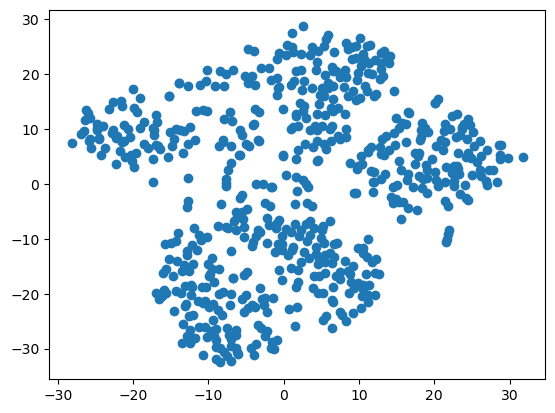

In [34]:
plt.scatter(df_X_pca['x'],df_X_pca['y'])
plt.show()

The clusters on data without "MYOPIA" column depict a fairly even distribution of clusters, with a slight distinction of more clusters formed around the lower end of the chart. Clusters seem to appear closer together with a higher X and Y value.

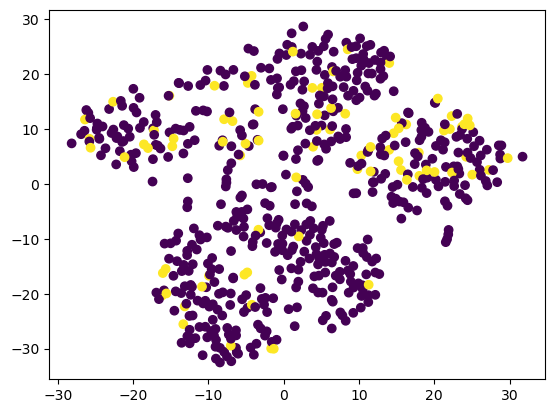

In [35]:
plt.scatter(df_X_pca['x'], df_X_pca['y'], c=labels)
plt.show()

When "MYOPIA" is combined with Exhibit 1, it appears to depict a very similar distribution of clusters as in exhibit 1

# Part 3: Perform a Cluster Analysis with K-means

In [40]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_X_pca)
    inertia.append(km.inertia_)


elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\prern\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,264746.716839
1,2,145777.717863
2,3,83775.543043
3,4,60076.958009
4,5,44814.181851


<function matplotlib.pyplot.show(close=None, block=None)>

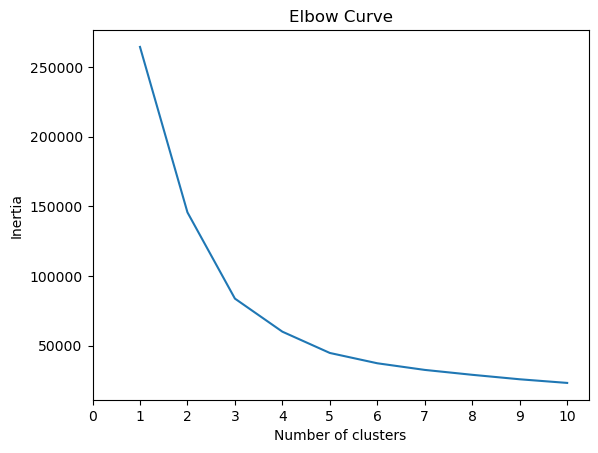

In [37]:
#plotel elbow curve

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show

After looping and determining the inertia for each k between 1 through 10, the elbow of the plot seems to be on 3. Hence, k = 3.

In [41]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_X_pca)

# Predict clusters
predictions = model.predict(df_X_pca)

# Add the predicted class column to the dataframe
df_X_pca["class"] = model.labels_
df_X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-4.772960,18.360390,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,19.044039,1.114432,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,2.237335,-14.201783,2
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,-4.847250,-16.124170,2
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1.673193,12.413346,1


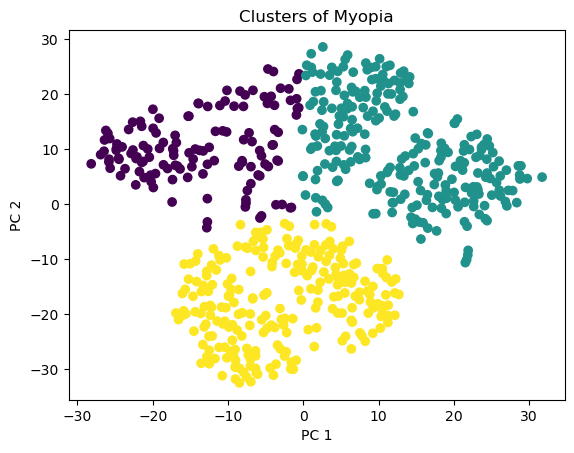

In [42]:
# Plot k=3 clusters
plt.scatter(x=df_X_pca['x'], y=df_X_pca['y'], c= df_X_pca['class'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clusters of Myopia')
plt.show()

Part 4: Make a Recommendation

Elbow Curve Analysis
This method helps us determine the optimal number of clusters to use for k-means cluster analysis.
As we can see, the curve indicates an optimal number of 3 clusters.

Cluster Analysis
Findings based on elbow curve and k-means cluster analysis

I would recommend splitting into 3 groups of patients.